<a href="https://colab.research.google.com/github/moosa200/telecom-churn-analysis/blob/main/Sales_Forecasting_using_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving superstore sales.csv to superstore sales (1).csv


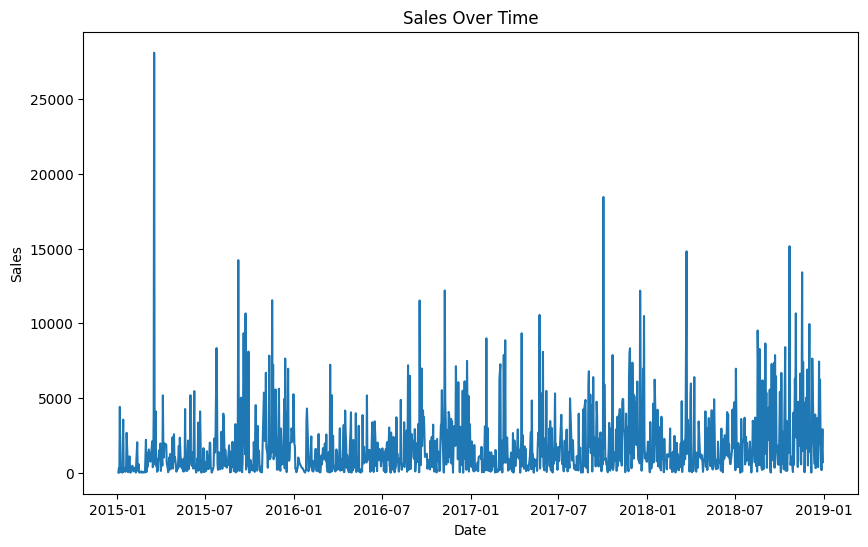

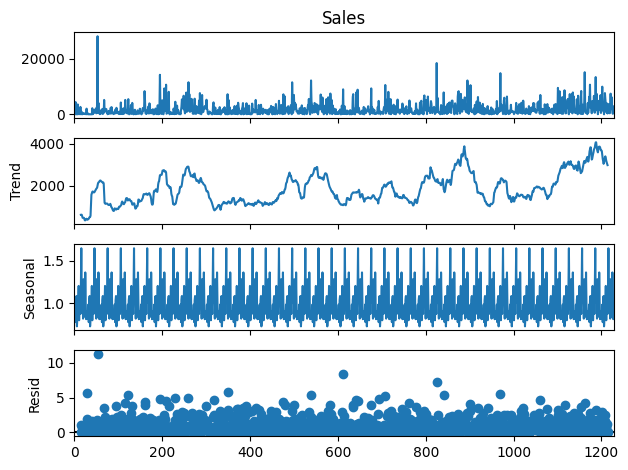

1223    3078.094494
1224    2641.960555
1225    2856.598497
1226    3172.588767
1227    3726.656947
1228    2902.490828
1229    3081.016429
Name: predicted_mean, dtype: float64
MAE: 1814.0655661450749
MSE: 4711785.446347597


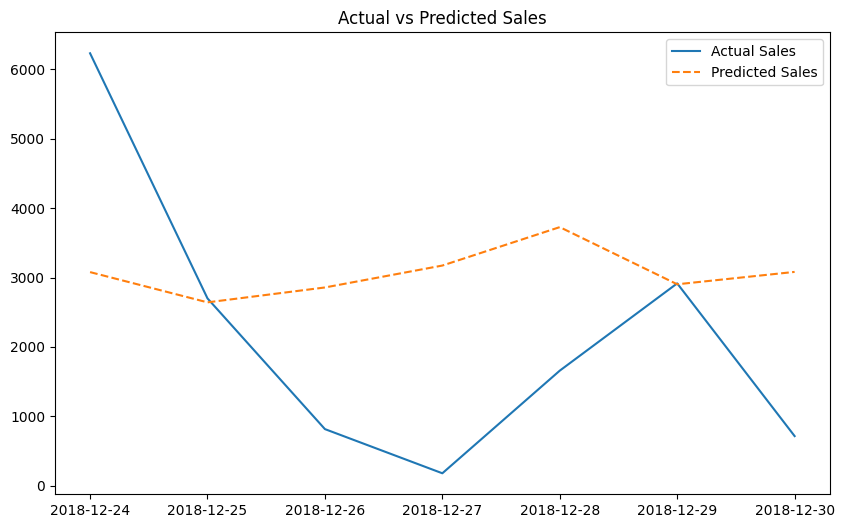

In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Load your dataset
df = pd.read_csv('superstore sales.csv')

# Convert 'Order Date' to datetime with correct format (day first)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Check the first few rows of the data
df.head()

# Check for any missing values
df.isnull().sum()

# Fill missing values if needed
df.fillna(0, inplace=True)

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['DayOfWeek'] = df['Order Date'].dt.dayofweek
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(daily_sales['Sales'], model='multiplicative', period=30)
decomposed.plot()
plt.show()
train_data = daily_sales[:-7]  # All data except last 7 days
test_data = daily_sales[-7:]   # Last 7 days for testing
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model on training data (adjust p, d, q for better results)
model = ARIMA(train_data['Sales'], order=(5, 1, 0))  # Example: (p=5, d=1, q=0)
model_fit = model.fit()

# Forecast the next 7 days
forecast = model_fit.forecast(steps=7)
print(forecast)
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute MAE and MSE
print('MAE:', mean_absolute_error(test_data['Sales'], forecast))
print('MSE:', mean_squared_error(test_data['Sales'], forecast))
plt.figure(figsize=(10, 6))
plt.plot(test_data['Order Date'], test_data['Sales'], label='Actual Sales')
plt.plot(test_data['Order Date'], forecast, label='Predicted Sales', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.show()
notebook_filename = 'sales_forecasting_project.ipynb'
